In [1]:
#!pip install seaborn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv(r"D:\team3_data\project-team3-data\data-files\total_tmdbmovielist.csv", index_col=0)

C:\Users\user\.conda\envs\ykseo\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (1,4,7,12,17,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
movies.info()
# total row = 630159 entries
# total column = 25 columns
# release_date, budget, revenue, popularity 데이터 타입 변경 필요  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 630159 entries, 0 to 630185
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   adult                  630158 non-null  object 
 1   backdrop_path          150102 non-null  object 
 2   belongs_to_collection  11995 non-null   object 
 3   budget                 630157 non-null  object 
 4   genres                 630155 non-null  object 
 5   homepage               69801 non-null   object 
 6   id                     630156 non-null  object 
 7   imdb_id                396414 non-null  object 
 8   original_language      630157 non-null  object 
 9   original_title         630130 non-null  object 
 10  overview               25238 non-null   object 
 11  popularity             630119 non-null  object 
 12  poster_path            426255 non-null  object 
 13  production_companies   630119 non-null  object 
 14  production_countries   630088 non-nu

In [4]:
movies.head()

# 다음에 해당하는 영화를 다수 포함하고 있음. 
# budget, revenue, runtime 값이 0인 영화  => data입력이 없을 경우 zero로 입력되어 있음. 모두 제거하기로 
# genre, release_date 정보가 없는 영화 
# 필요없는 칼럼: adult, poster_path,backdrop_path, belongs_to_collection, homepage, imdb_id, tagline, overview, video

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,/hQ4pYsIbP22TMXOUdSfC2mjWrO0.jpg,NaN,0.0,"[{'id': 18, 'name': '드라마'}, {'id': 80, 'name':...",NaN,2.0,tt0094675,fi,Ariel,...,1988-10-21,0.0,73.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,아리엘,False,6.9,150.0
1,False,/l94l89eMmFKh7na2a1u5q67VgNx.jpg,NaN,0.0,"[{'id': 18, 'name': '드라마'}, {'id': 35, 'name':...",NaN,3.0,tt0092149,fi,Varjoja paratiisissa,...,1986-10-17,0.0,76.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,천국의 그림자,False,7.2,149.0
2,False,/bCXLsO2MJWzYYBJoavGOZN5iqGn.jpg,NaN,4000000.0,"[{'id': 80, 'name': '범죄'}, {'id': 35, 'name': ...",https://www.miramax.com/movie/four-rooms/,5.0,tt0113101,en,Four Rooms,...,1995-12-09,4257354.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,네 가지 이야기들로 이루어진 옴니버스 영화,포룸,False,5.7,2035.0
3,False,/5aXp2s4l6g5PcMMesIj63mx8hmJ.jpg,NaN,21000000.0,"[{'id': 28, 'name': '액션'}, {'id': 53, 'name': ...",NaN,6.0,tt0107286,en,Judgment Night,...,1993-10-15,12136938.0,110.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,킬러 나이트,False,6.5,215.0
4,False,NaN,NaN,42000.0,"[{'id': 99, 'name': '다큐멘터리'}]",http://www.lifeinloops.com,8.0,tt0825671,en,Life in Loops (A Megacities RMX),...,2006-01-01,0.0,80.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Life in Loops (A Megacities RMX),False,7.5,18.0


In [5]:
# 원본 데이터프레임 보존
movies_backup=movies.copy()

In [6]:
# 중복데이터 여부 확인 

sum(movies.duplicated())

0

In [7]:
# 필요없는 칼럼제거 (adult, poster_path, backdrop_path, belongs_to_collection, homepage, imdb_id, tagline, overview, video) => movies_df 
movies=movies.drop(['adult','poster_path','backdrop_path','belongs_to_collection','homepage','imdb_id','tagline','overview','video'], axis=1)

In [8]:
# na를 포함하는 데이터 수 확인

movies.isna().apply(pd.value_counts)


,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
False,630157,630155,630156,630157,630130,630119,630119,630088,571778,630088,577000,630088,630088,630086,630086,630086
True,2,4,3,2,29,40,40,71,58381,71,53159,71,71,73,73,73


In [9]:
# na를 포함한 행제거

movies=movies.dropna()
movies.shape

(529373, 16)

In [10]:
# release_date 데이터 타입 변경 
movies['release_date']=pd.to_datetime(movies['release_date'])

In [11]:
# budget, revenue, popularity 데이터 타입 변경
movies['budget']=pd.to_numeric(movies['budget'])
movies['revenue']=pd.to_numeric(movies['revenue'])
movies['popularity']=pd.to_numeric(movies['popularity'])

In [12]:
# 데이터 타입 변경여부 확인
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529373 entries, 0 to 630184
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   budget                529373 non-null  float64       
 1   genres                529373 non-null  object        
 2   id                    529373 non-null  object        
 3   original_language     529373 non-null  object        
 4   original_title        529373 non-null  object        
 5   popularity            529373 non-null  float64       
 6   production_companies  529373 non-null  object        
 7   production_countries  529373 non-null  object        
 8   release_date          529373 non-null  datetime64[ns]
 9   revenue               529373 non-null  float64       
 10  runtime               529373 non-null  float64       
 11  spoken_languages      529373 non-null  object        
 12  status                529373 non-null  object        
 13 

In [13]:
movies.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,5.293730e+05,529373.000000,5.293730e+05,529373.000000,529373.000000,529373.000000
mean,3.778993e+05,1.566590,1.020239e+06,58.224787,2.424713,25.721559
std,5.349497e+06,19.998837,2.043374e+07,115.593764,3.208772,358.426959
min,0.000000e+00,0.600000,-1.200000e+01,0.000000,0.000000,0.000000
25%,0.000000e+00,0.600000,0.000000e+00,7.000000,0.000000,0.000000
50%,0.000000e+00,0.600000,0.000000e+00,59.000000,0.000000,0.000000
75%,0.000000e+00,0.869000,0.000000e+00,92.000000,5.600000,2.000000
max,3.800000e+08,8117.008000,2.847246e+09,51420.000000,10.000000,27092.000000


In [14]:
# revenue, budget, runtime이 모두 zero인 영화 제거

movies_revenue_zero_removal=movies[movies['revenue'] !=0]
movies_revenue_budget_zero_removal=movies_revenue_zero_removal[movies_revenue_zero_removal['budget'] !=0]
movies_revenue_budget_runtime_zero_removal=movies_revenue_budget_zero_removal[movies_revenue_budget_zero_removal['runtime'] !=0]

In [15]:
movies_revenue_budget_runtime_zero_removal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7069 entries, 2 to 630092
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                7069 non-null   float64       
 1   genres                7069 non-null   object        
 2   id                    7069 non-null   object        
 3   original_language     7069 non-null   object        
 4   original_title        7069 non-null   object        
 5   popularity            7069 non-null   float64       
 6   production_companies  7069 non-null   object        
 7   production_countries  7069 non-null   object        
 8   release_date          7069 non-null   datetime64[ns]
 9   revenue               7069 non-null   float64       
 10  runtime               7069 non-null   float64       
 11  spoken_languages      7069 non-null   object        
 12  status                7069 non-null   object        
 13  title           

In [17]:
# 칼럼 재구성: profit, 개봉년, 개봉월, 개봉요일, 계절 칼럼 추가
movies_revenue_budget_runtime_zero_removal['profit'] = movies_revenue_budget_runtime_zero_removal['revenue'] -movies_revenue_budget_runtime_zero_removal['budget']
movies_revenue_budget_runtime_zero_removal['release_year'] = movies_revenue_budget_runtime_zero_removal['release_date'].dt.year
movies_revenue_budget_runtime_zero_removal['release_month'] = movies_revenue_budget_runtime_zero_removal['release_date'].dt.month
movies_revenue_budget_runtime_zero_removal['release_day'] = movies_revenue_budget_runtime_zero_removal['release_date'].dt.weekday # 월요일(0)~일요일(6)

C:\Users\user\AppData\Local\Temp/ipykernel_8196/4266326896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_revenue_budget_runtime_zero_removal['profit'] = movies_revenue_budget_runtime_zero_removal['revenue'] -movies_revenue_budget_runtime_zero_removal['budget']
C:\Users\user\AppData\Local\Temp/ipykernel_8196/4266326896.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_revenue_budget_runtime_zero_removal['release_year'] = movies_revenue_budget_runtime_zero_removal['release_date'].dt.year

In [18]:
# 계절 칼럼 추가를 위한 함수

def to_season(month):
    if 3<= month <=5:
        return 'spring'
    elif 6<= month <=8:
        return 'summer'
    elif 9<= month <=11:
        return 'fall'
    else:
        return 'winter'

movies_revenue_budget_runtime_zero_removal['seasons']=movies_revenue_budget_runtime_zero_removal.release_month.apply(to_season)

C:\Users\user\AppData\Local\Temp/ipykernel_8196/1986561993.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_revenue_budget_runtime_zero_removal['seasons']=movies_revenue_budget_runtime_zero_removal.release_month.apply(to_season)


In [19]:
movies_revenue_budget_runtime_zero_removal.head()

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,...,spoken_languages,status,title,vote_average,vote_count,profit,release_year,release_month,release_day,seasons
2,4000000.0,"[{'id': 80, 'name': '범죄'}, {'id': 35, 'name': ...",5.0,en,Four Rooms,12.067,"[{'id': 14, 'logo_path': '/m6AHu84oZQxvq7n1rsv...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-09,4257354.0,...,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,포룸,5.7,2035.0,257354.0,1995,12,5,winter
3,21000000.0,"[{'id': 28, 'name': '액션'}, {'id': 53, 'name': ...",6.0,en,Judgment Night,8.330,"[{'id': 33, 'logo_path': '/8lvHyhjr8oUKOOy2dKX...","[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",1993-10-15,12136938.0,...,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,킬러 나이트,6.5,215.0,-8863062.0,1993,10,4,fall
6,11000000.0,"[{'id': 12, 'name': '모험'}, {'id': 28, 'name': ...",11.0,en,Star Wars,61.553,"[{'id': 1, 'logo_path': '/o86DbpburjxrqAzEDhXZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",1977-05-25,775398007.0,...,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,스타워즈: 에피소드 4 새로운 희망,8.2,16272.0,764398007.0,1977,5,2,spring
7,94000000.0,"[{'id': 16, 'name': '애니메이션'}, {'id': 10751, 'n...",12.0,en,Finding Nemo,81.449,"[{'id': 3, 'logo_path': '/1TjvGVDMYsj6JBxOAkUH...","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-05-30,940335536.0,...,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,니모를 찾아서,7.8,15658.0,846335536.0,2003,5,4,spring
8,55000000.0,"[{'id': 35, 'name': '코미디'}, {'id': 18, 'name':...",13.0,en,Forrest Gump,42.886,"[{'id': 4, 'logo_path': '/fycMZt242LVjagMByZOL...","[{'iso_3166_1': 'US', 'name': 'United States o...",1994-07-06,677387716.0,...,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,포레스트 검프,8.5,21589.0,622387716.0,1994,7,2,summer


In [20]:
movies_revenue_budget_runtime_zero_removal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7069 entries, 2 to 630092
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                7069 non-null   float64       
 1   genres                7069 non-null   object        
 2   id                    7069 non-null   object        
 3   original_language     7069 non-null   object        
 4   original_title        7069 non-null   object        
 5   popularity            7069 non-null   float64       
 6   production_companies  7069 non-null   object        
 7   production_countries  7069 non-null   object        
 8   release_date          7069 non-null   datetime64[ns]
 9   revenue               7069 non-null   float64       
 10  runtime               7069 non-null   float64       
 11  spoken_languages      7069 non-null   object        
 12  status                7069 non-null   object        
 13  title           

In [21]:
movies_revenue_budget_runtime_zero_removal.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,profit,release_year,release_month,release_day
count,7.069000e+03,7069.000000,7.069000e+03,7069.000000,7069.000000,7069.000000,7.069000e+03,7069.000000,7069.000000,7069.000000
mean,2.422871e+07,23.592395,7.214051e+07,105.115434,6.130033,1437.733626,4.791180e+07,2002.581978,6.854435,3.205545
std,3.728906e+07,134.186815,1.598070e+08,31.733330,1.984751,2702.572756,1.349581e+08,17.264642,3.423867,1.356008
min,1.000000e+00,0.600000,-1.200000e+01,1.000000,0.000000,0.000000,-1.947758e+08,1914.000000,1.000000,0.000000
25%,1.500000e+06,4.999000,1.598584e+06,93.000000,5.800000,56.000000,-6.163000e+04,1996.000000,4.000000,2.000000
50%,1.000000e+07,12.120000,1.713345e+07,104.000000,6.500000,433.000000,3.913000e+06,2007.000000,7.000000,4.000000
75%,3.000000e+07,18.963000,6.982320e+07,120.000000,7.100000,1475.000000,4.113406e+07,2015.000000,10.000000,4.000000
max,3.800000e+08,8117.008000,2.847246e+09,480.000000,10.000000,27092.000000,2.610246e+09,2023.000000,12.000000,6.000000


목적변수 <- 설명변수
1. vote_average <- budget, revenue, proft, popularity, production_companies, production_countries, original_language, vote_count, release_year,   
                   release_month, release_day, seasons, runtime
2. genres <- release_year, release_month, release_day, seasons, production_countries, production_companies
3. popularity <- genres, release_year, release_month, release_day, seasons, production_countries, production_companies

In [20]:
movies_revenue_budget_runtime_zero_removal.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,7.069000e+03,7069.000000,7.069000e+03,7069.000000,7069.000000,7069.000000
mean,2.422871e+07,23.592395,7.214051e+07,105.115434,6.130033,1437.733626
std,3.728906e+07,134.186815,1.598070e+08,31.733330,1.984751,2702.572756
min,1.000000e+00,0.600000,-1.200000e+01,1.000000,0.000000,0.000000
25%,1.500000e+06,4.999000,1.598584e+06,93.000000,5.800000,56.000000
50%,1.000000e+07,12.120000,1.713345e+07,104.000000,6.500000,433.000000
75%,3.000000e+07,18.963000,6.982320e+07,120.000000,7.100000,1475.000000
max,3.800000e+08,8117.008000,2.847246e+09,480.000000,10.000000,27092.000000


array([[<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'release_date'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_average'}>],
       [<AxesSubplot:title={'center':'vote_count'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

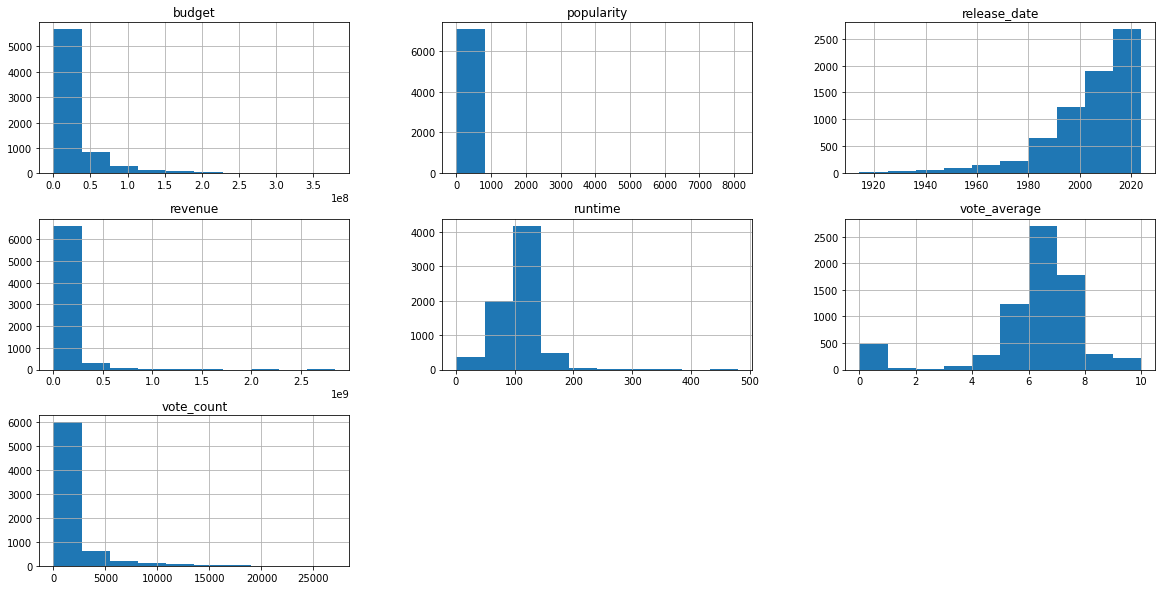

In [19]:
movies_revenue_budget_runtime_zero_removal.hist(figsize=(20,10))

In [30]:
#### vote_average ###

# vote count가 7069(vote_count 평균)개 이상인 영화 중 평점이 가장 높은 영화는?
high_vote=movies_revenue_budget_runtime_zero_removal.sort_values(by='vote_average',ascending=False)
high_vote=high_vote[high_vote.vote_count>7069]
high_vote[['id','title','vote_average','vote_count','budget','profit']].head(10)

,id,title,vote_average,vote_count,budget,profit
230,278.0,쇼생크 탈출,8.7,20134.0,25000000.0,3.341469e+06
192,238.0,대부,8.7,15086.0,6000000.0,2.390664e+08
332,424.0,쉰들러 리스트,8.6,12041.0,22000000.0,2.993656e+08
194,240.0,대부 2,8.6,9076.0,13000000.0,8.960000e+07
8,13.0,포레스트 검프,8.5,21589.0,55000000.0,6.223877e+08
386,497.0,그린 마일,8.5,13053.0,60000000.0,2.268014e+08
550,680.0,펄프 픽션,8.5,22098.0,8000000.0,2.061791e+08
509,637.0,인생은 아름다워,8.5,10587.0,20000000.0,2.100988e+08
93,129.0,센과 치히로의 행방불명,8.5,12062.0,19000000.0,2.559251e+08
86,122.0,반지의 제왕: 왕의 귀환,8.5,18584.0,94000000.0,1.024889e+09


C:\Users\user\AppData\Local\Temp/ipykernel_8196/3396500811.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_revenue_budget_runtime_zero_removal['year_group']=year_group


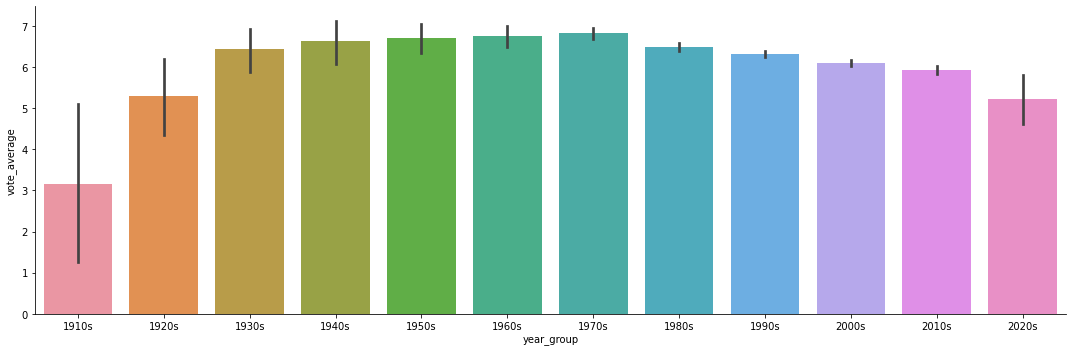

In [29]:
# 개봉년도에 따른 vote_average: 년도를 10년 단위로 범주화 (1914~ 2023)
year_group=pd.cut(movies_revenue_budget_runtime_zero_removal['release_year'],bins=[1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020,2030], labels=['1910s','1920s','1930s','1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s','2020s'])
movies_revenue_budget_runtime_zero_removal['year_group']=year_group
movies_revenue_budget_runtime_zero_removal.head(1)
movies_revenue_budget_runtime_zero_removal.groupby(by='year_group')['vote_average'].mean()
sns.catplot(data=movies_revenue_budget_runtime_zero_removal, x='year_group', y='vote_average', kind='bar',height=5, aspect=3)

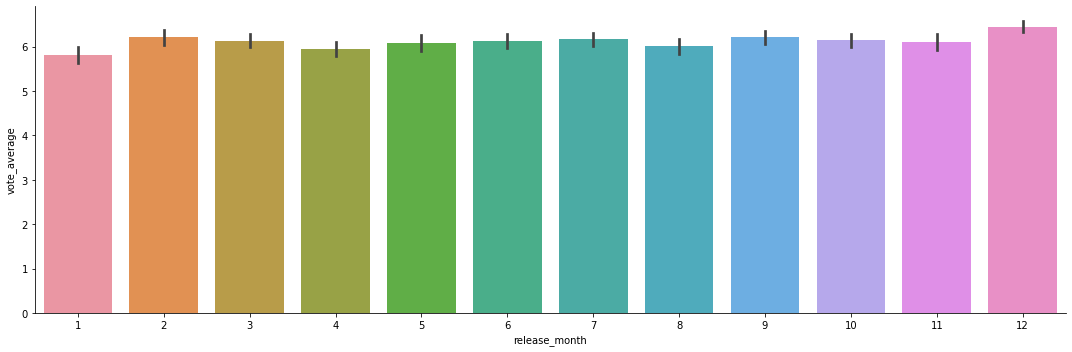

In [31]:
# 개봉월에 따른 vote_average
movies_revenue_budget_runtime_zero_removal.groupby(by='release_month')['vote_average'].mean()
sns.catplot(data=movies_revenue_budget_runtime_zero_removal, x='release_month', y='vote_average', kind='bar',height=5, aspect=3)

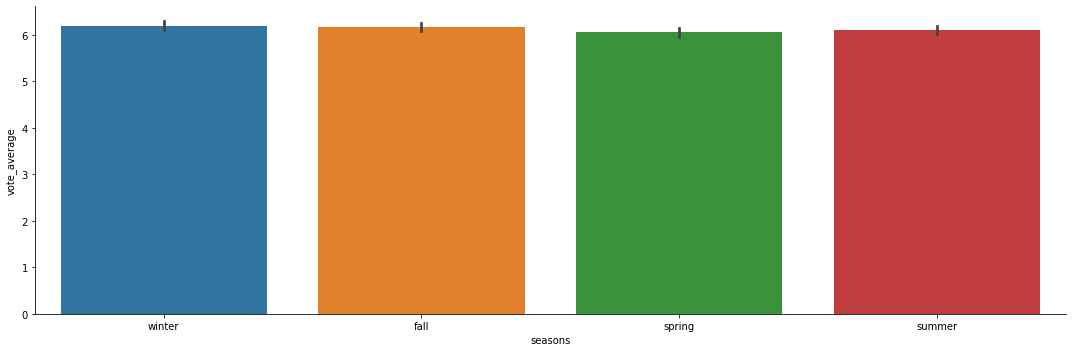

In [32]:
# 개봉계절에 따른 vote_average
movies_revenue_budget_runtime_zero_removal.groupby(by='seasons')['vote_average'].mean()
sns.catplot(data=movies_revenue_budget_runtime_zero_removal, x='seasons', y='vote_average', kind='bar',height=5, aspect=3)

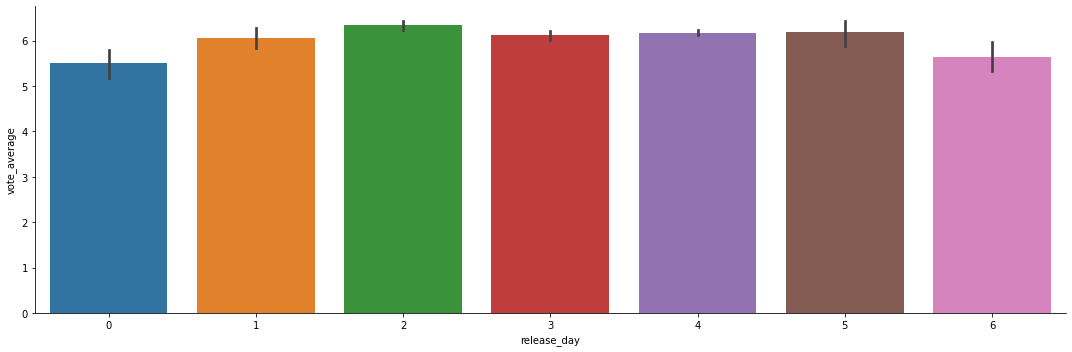

In [33]:
# 개봉요일에 따른 vote_average
movies_revenue_budget_runtime_zero_removal.groupby(by='release_day')['vote_average'].mean()
sns.catplot(data=movies_revenue_budget_runtime_zero_removal, x='release_day', y='vote_average', kind='bar',height=5, aspect=3)

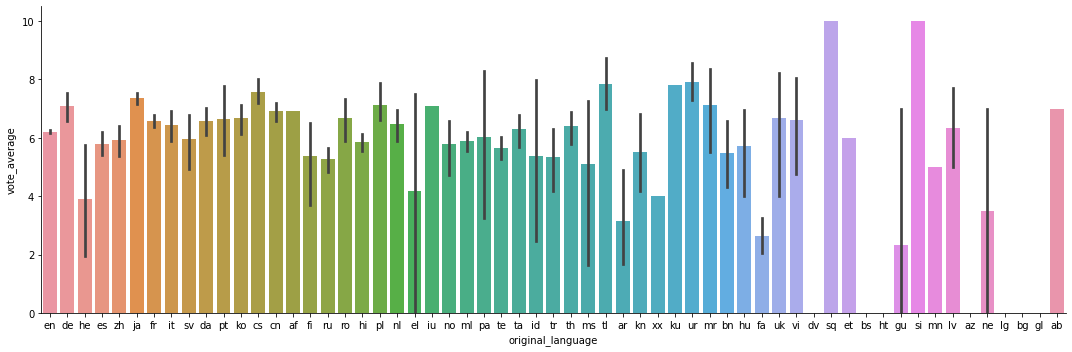

In [41]:
# original_language에 따른 vote_average
movies_revenue_budget_runtime_zero_removal.groupby(by='original_language')['vote_average'].mean()
sns.catplot(data=movies_revenue_budget_runtime_zero_removal, x='original_language', y='vote_average', kind='bar',height=5, aspect=3)

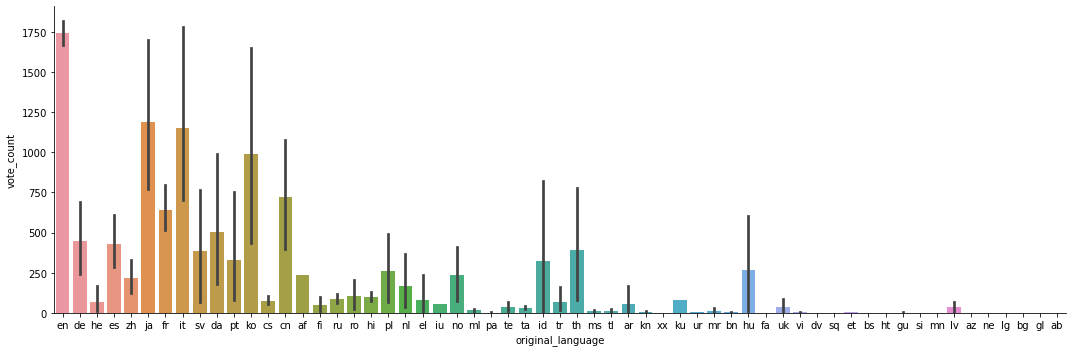

In [42]:
## original_language에 따른 vote_count (original_language에 따른 vote_average해석 참고용)
movies_revenue_budget_runtime_zero_removal.groupby(by='original_language')['vote_count'].mean()
sns.catplot(data=movies_revenue_budget_runtime_zero_removal, x='original_language', y='vote_count', kind='bar',height=5, aspect=3)

In [ ]:
# 제작회사에 따른 vote_average
movies_revenue_budget_runtime_zero_removal.groupby(by='production_companies')['vote_average'].mean()
sns.catplot(data=movies_revenue_budget_runtime_zero_removal, x='production_companies', y='vote_average', kind='bar',height=5, aspect=3)

In [ ]:
# 제작국가에 따른 vote_average
movies_revenue_budget_runtime_zero_removal.groupby(by='production_countries')['vote_average'].mean()
sns.catplot(data=movies_revenue_budget_runtime_zero_removal, x='production_countries', y='vote_average', kind='bar',height=5, aspect=3)

Text(0.5, 1.0, 'relation between vote_count and vote_average')

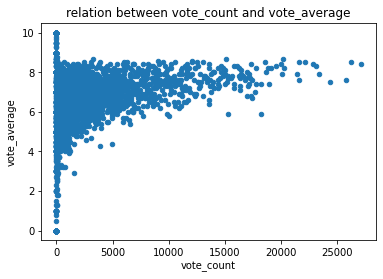

In [36]:
# vote_count에 따른 vote_average
movies_revenue_budget_runtime_zero_removal.plot(x='vote_count', y='vote_average', kind='scatter')
plt.title('relation between vote_count and vote_average')

Text(0.5, 1.0, 'relation between budget and vote_average')

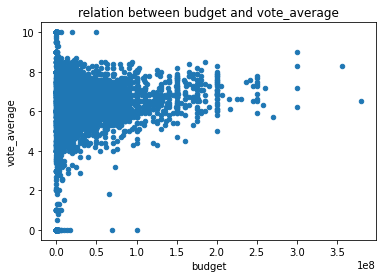

In [35]:
# budget에 따른 vote_average
movies_revenue_budget_runtime_zero_removal.plot(x='budget', y='vote_average', kind='scatter')
plt.title('relation between budget and vote_average')

Text(0.5, 1.0, 'relation between profit and vote_average')

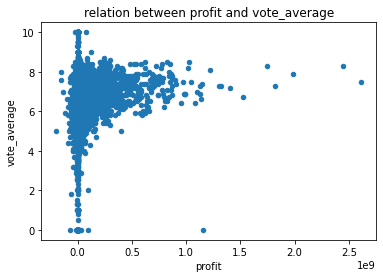

In [37]:
# profit에 따른 vote_average
movies_revenue_budget_runtime_zero_removal.plot(x='profit', y='vote_average', kind='scatter')
plt.title('relation between profit and vote_average')

Text(0.5, 1.0, 'relation between popularity and vote_average')

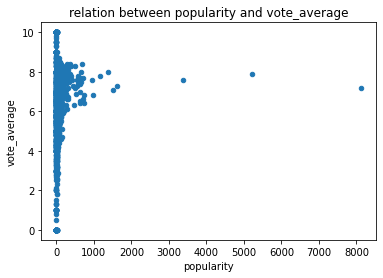

In [38]:
# popularity에 따른 vote_average
movies_revenue_budget_runtime_zero_removal.plot(x='popularity', y='vote_average', kind='scatter')
plt.title('relation between popularity and vote_average')

Text(0.5, 1.0, 'relation between runtime and vote_average')

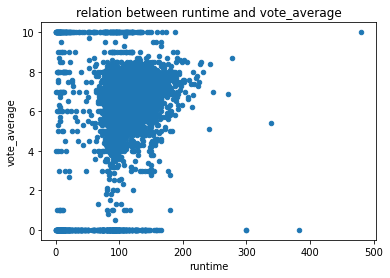

In [39]:
# runtime에 따른 vote_average
movies_revenue_budget_runtime_zero_removal.plot(x='runtime', y='vote_average', kind='scatter')
plt.title('relation between runtime and vote_average')

In [43]:
#### revenue, budget, profit ###

# profit이 가장 높은 영화 
high_profit = movies_revenue_budget_runtime_zero_removal.sort_values(by="profit", ascending=False)
high_profit[['id','title','profit','popularity','vote_average']].head(3)



,id,title,profit,popularity,vote_average
36678,19995.0,아바타,2.610246e+09,346.670,7.5
129815,299534.0,어벤져스: 엔드게임,2.441801e+09,245.516,8.3
471,597.0,타이타닉,1.987464e+09,97.943,7.9


In [46]:
# revenue이 가장 높은 영화
high_revenue = movies_revenue_budget_runtime_zero_removal.sort_values(by="revenue", ascending=False)
high_revenue[['id','title','revenue','popularity','vote_average']].head(3)

,id,title,revenue,popularity,vote_average
36678,19995.0,아바타,2.847246e+09,346.670,7.5
129815,299534.0,어벤져스: 엔드게임,2.797801e+09,245.516,8.3
471,597.0,타이타닉,2.187464e+09,97.943,7.9


In [47]:
# budget이 가장 높은 영화
high_budget = movies_revenue_budget_runtime_zero_removal.sort_values(by="budget", ascending=False)
high_budget[['id','title','budget','popularity','vote_average']].head(3)

,id,title,budget,popularity,vote_average
1239,1865.0,캐리비안의 해적: 낯선 조류,380000000.0,127.811,6.5
129815,299534.0,어벤져스: 엔드게임,356000000.0,245.516,8.3
29158,141052.0,저스티스 리그,300000000.0,62.896,6.2


In [48]:
#### genre ###

# 각 영화에 포함된 영화장르 수는?  --> 한 영화에 포함된 장르수는 최소1개, 최대 959개

for i, e in enumerate(movies_revenue_budget_runtime_zero_removal['genres'][:5]):
    print(i, e)

genre_numbers=movies_revenue_budget_runtime_zero_removal['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()
pd.DataFrame(genre_numbers)
print(genre_numbers.describe())

0 [{'id': 80, 'name': '범죄'}, {'id': 35, 'name': '코미디'}]
1 [{'id': 28, 'name': '액션'}, {'id': 53, 'name': '스릴러'}, {'id': 80, 'name': '범죄'}]
2 [{'id': 12, 'name': '모험'}, {'id': 28, 'name': '액션'}, {'id': 878, 'name': 'SF'}]
3 [{'id': 16, 'name': '애니메이션'}, {'id': 10751, 'name': '가족'}]
4 [{'id': 35, 'name': '코미디'}, {'id': 18, 'name': '드라마'}, {'id': 10749, 'name': '로맨스'}]
count     70.000000
mean     100.985714
std      195.446534
min        1.000000
25%        3.000000
50%       17.000000
75%       80.000000
max      959.000000
Name: genres, dtype: float64


In [ ]:
# 장르수가 가장 많이 포함된 영화는?

In [49]:
# 가장 많은 영화장르 수는?

def genres_str_to_list(genres_str):
    import json
    genres_list = json.loads(genres_str.replace("\'", "\""))
    genre_id_list = []
    for genre in genres_list:
        genre_id_list.append(genre['name'])

    return genre_id_list

movies_revenue_budget_runtime_zero_removal['genre_name'] = movies_revenue_budget_runtime_zero_removal["genres"].map(genres_str_to_list)

list_of_genres=movies_revenue_budget_runtime_zero_removal['genre_name'].values
print(list_of_genres)

[list(['범죄', '코미디']) list(['액션', '스릴러', '범죄']) list(['모험', '액션', 'SF'])
 ... list(['드라마', '가족']) list(['애니메이션', '코미디']) list(['공포'])]


C:\Users\user\AppData\Local\Temp/ipykernel_8196/2820306022.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_revenue_budget_runtime_zero_removal['genre_name'] = movies_revenue_budget_runtime_zero_removal["genres"].map(genres_str_to_list)


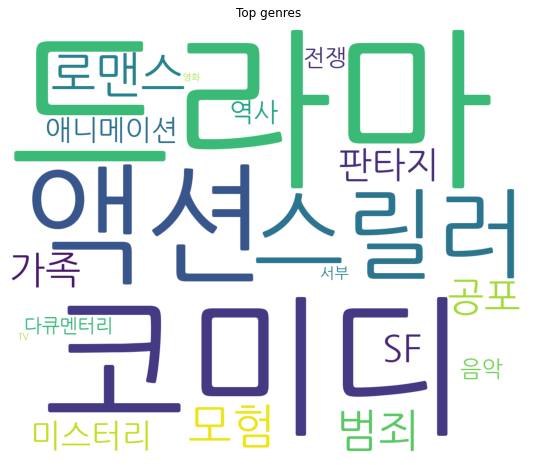

In [50]:
#!pip install wordcloud
from wordcloud import WordCloud

plt.figure(figsize = (12, 8))
text = ' '.join([i for j in list_of_genres for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False, font_path= "D:\\Fonts\\NanumGothic.ttf",
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top genres')
plt.axis("off")
plt.show()